<a href="https://colab.research.google.com/github/mukeshcse07/Machine-Learning-Project/blob/main/Hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import SimpleImputer


In [ ]:
file_path = '/content/online_shoppers_intention.csv'
data = pd.read_csv(file_path)
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=[object]).columns
imputer_num = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer_num.fit_transform(data[numeric_cols])
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])
for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data_scaled)
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
clusters = agg_clustering.fit_predict(data_pca)
data['Cluster'] = clusters


In [ ]:
silhouette_avg = silhouette_score(data_pca, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.7614452889432747


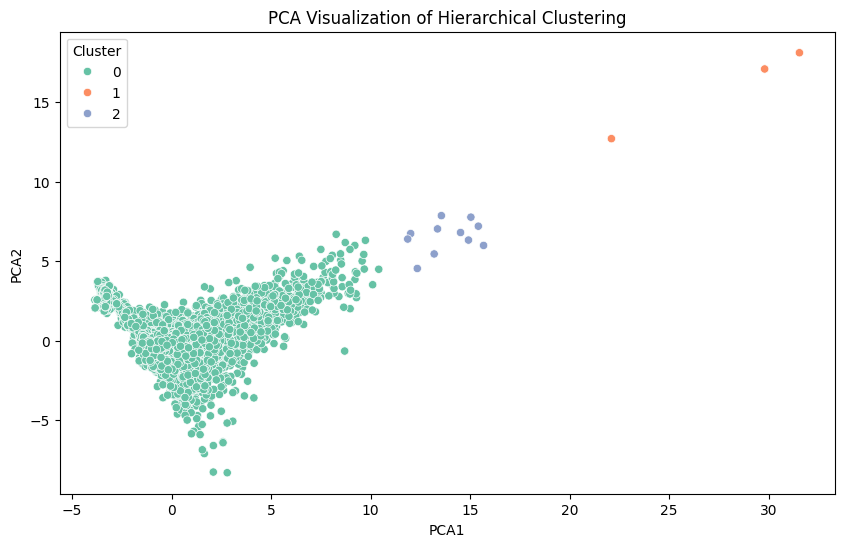

In [ ]:
pca_2d = PCA(n_components=2)
pca_result = pca_2d.fit_transform(data_pca)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data['Cluster']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=pca_df)
plt.title('PCA Visualization of Hierarchical Clustering')
plt.show()


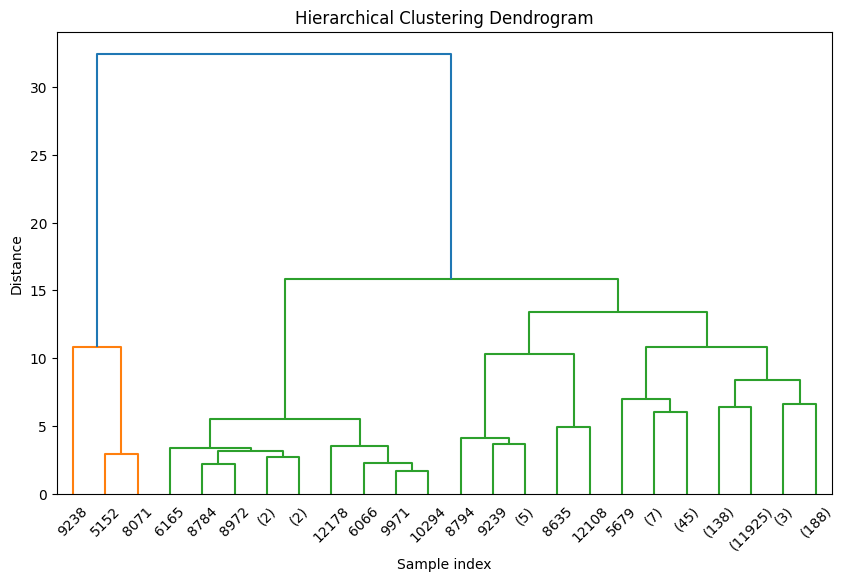

In [ ]:
plt.figure(figsize=(10, 6))
Z = linkage(data_pca, method='average')
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
